In [22]:
# code here...

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
%matplotlib notebook
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

### Read the data

- Download the exercise 4 data from exercise 4 tab in the Moodle page of this course.
- Read the ship data from the csv file into a Pandas dataframe.
- This file is already cleaned of outliers and missing values etc. Normally data cleaning is an important part of unsupervised learning, but since it has already been done in the previous exercises, we can start this one with already clean data.

In [23]:
# code here...
data = pd.read_csv('shipdata2021_ex4') 
data.head() #check the clean data frame


,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1377,64.3074,Hamina,Cargo,3416,94.91,15.34
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00
2,219082000,9.9416,74.6762,Hamina,Tanker,9980,141.20,21.90
3,219083000,11.6038,74.7529,Hamina,Tanker,9980,141.20,21.60
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00


### Part 1: Preprocess and visualize the data

 - Use "Speed", "COG", "Length", and "Gross_tonnage" as features for this exercise. You will also need the 'Ship_type' -column later to be used as labels for evaluating the performance of the clustering algorithm.
  
 - Perform z-score standardization on the features to ensure that all features have the same scale.
 
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet. Can you guess where the different ship types are in the scatter plot? Don't worry if they're hard to see.
 
 - The set of features used in this exercise is not necessarily the most sensible from the point of view of real life maritime data-analysis, but rather has been chosen in an ad-hoc manner for the purpose of designing this exercise with a certain level of clustering performance. Consider the features given for now.

In [24]:
# code here...
import scipy.stats as stats

data_nov = data[['Speed','COG','Length','Gross_tonnage']]
data_nov.head()
z = StandardScaler().fit_transform(data_nov)



pca = PCA(n_components=2)

ppCmp = pca.fit_transform(z)

ppDF = pd.DataFrame(data = ppCmp, columns = ['PC1', 'PC2'])



<IPython.core.display.Javascript object>


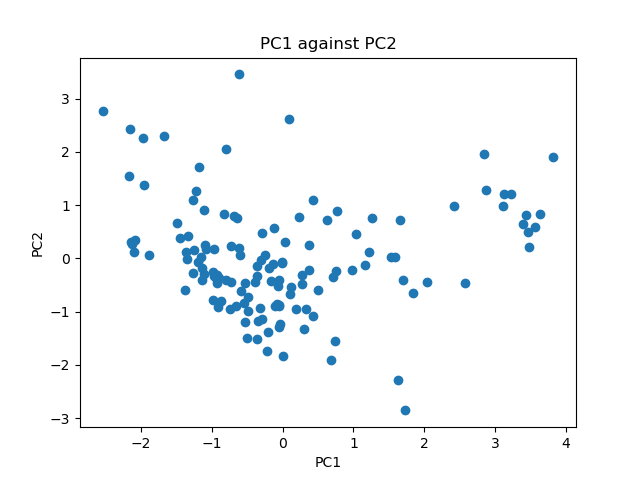

Text(0, 0.5, 'PC2')

In [25]:
plt.scatter(ppDF.PC1, ppDF.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

####  Part 1 : Answers here:

Since we performed standardization on the data set, the different clusters are hard to see at this point of the modelling. However, we might intuitively guess that the different clusters are where a high concentration of points are, so in the middle would be one of them, another on the right, an possibly another on the top left (even though this one doesn't really have visually compact points)

### Part 2: Perform clustering on the data and evaluate the results using silhouette score

 - What is the significance of the linkage criterion in a hierarchical clustering algorithm?
 
 - Perform agglomerative hierarchical clustering on the data, trying different values for the "linkage" parameter. Use the actual number of different ship types for the number of clusters to find and default values for other parameters.
 
 - Use the z-score standardized 4-dimensional data for the clustering - not the PCA-transformed data!
 
 - Evaluate the clustering performance for each linkage criterion using a metric called "silhouette score". What does silhouette score quantify and how is it computed?

In [26]:
# code here...
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


targetDataframe = data[['Ship_type']]
linkage = ['ward', 'complete', 'average', 'single']


for i in linkage: 
    labels_pred = AgglomerativeClustering(n_clusters=len(np.unique(targetDataframe)), linkage=i).fit_predict(z)
    score = silhouette_score(z, labels_pred)
    print("Silhouette score for ->",i," =",score)

Silhouette score for -> ward  = 0.4397650336270209
Silhouette score for -> complete  = 0.2641065621059478
Silhouette score for -> average  = 0.47142342120337954
Silhouette score for -> single  = 0.29176878276068163


####  Part 2 : Answers here:

Silhouette score is a metric used to calculatehow good (precise) is a clustering technique. Its value ranges from -1 to 1. A positive value, for example 1, means that clusters are clearly distinguished, while -1 means that clusters are assigned the wrong way. 0 means that clusters are indifferent, or we can say that the distance between clusters is not so significant. Thus, based on our results, we might say that our clusters could be distinguished but have a mostly insignificant distance between them.

###  Part 3a: Compare the clusters with the true labels
 
 - If you performed the previous steps as instructed, the "average" linkage criterion should be the best performing linkage criterion (that is, with respect to the silhouette score).
 
 - Perform agglomerative hierarchical clustering on the (z-score standardized, not pca-transformed) data using the "average" linkage criterion and the number of different ship types for the number of clusters to find. Again, use default values for other parameters. Visualize the clusters with a scatterplot by performing PCA transformation to two dimensions and color the scatterplot based on the predictions produced by the clustering algorithm. 
 
 - Visualize the data again using PCA, this time coloring the scatter plot based on the true class labels. Compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 
 - Based on the visual comparison between the clusters and true classes, would you say that the clustering was successful?
 
 - Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
- "Adjusted rand index" is corrected for chance by using maximum and expected values of rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)
 
- For an objective evaluation of the clustering, compute the adjusted rand score (use the scikit-learn implementation) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 
- If the results seem unimpressive, don't get discouraged - clustering "real life" data sets is a difficult task, and a low rand score does not necessarily mean that you have made a mistake.

In [7]:
# code here...


clust = AgglomerativeClustering(n_clusters=len(np.unique(targetDataframe)), linkage='average')


targetDataframe_pred = clust.fit_predict(z)



#print(targetDataframe_pred) # did this to see who 0, 1 and 2 correspond to


print(np.unique(targetDataframe))
df = pd.DataFrame(targetDataframe_pred, columns=['Ship_type'])
df['Ship_type'] = df['Ship_type'].replace(0, "Cargo")
df['Ship_type'] = df['Ship_type'].replace(1, "Tanker")
df['Ship_type'] = df['Ship_type'].replace(2, "Tug")


newDataframe_pred = pd.concat([principalDataframe, df],axis = 1)
newDataframe_pred.head()


['Cargo' 'Tanker' 'Tug']


,PC1,PC2,Ship_type
0,-0.652630,-0.889659,Cargo
1,0.183623,-0.945607,Cargo
2,-0.011165,-0.082108,Cargo
3,0.280380,-0.482212,Cargo
4,-0.215014,-1.731853,Cargo


<IPython.core.display.Javascript object>


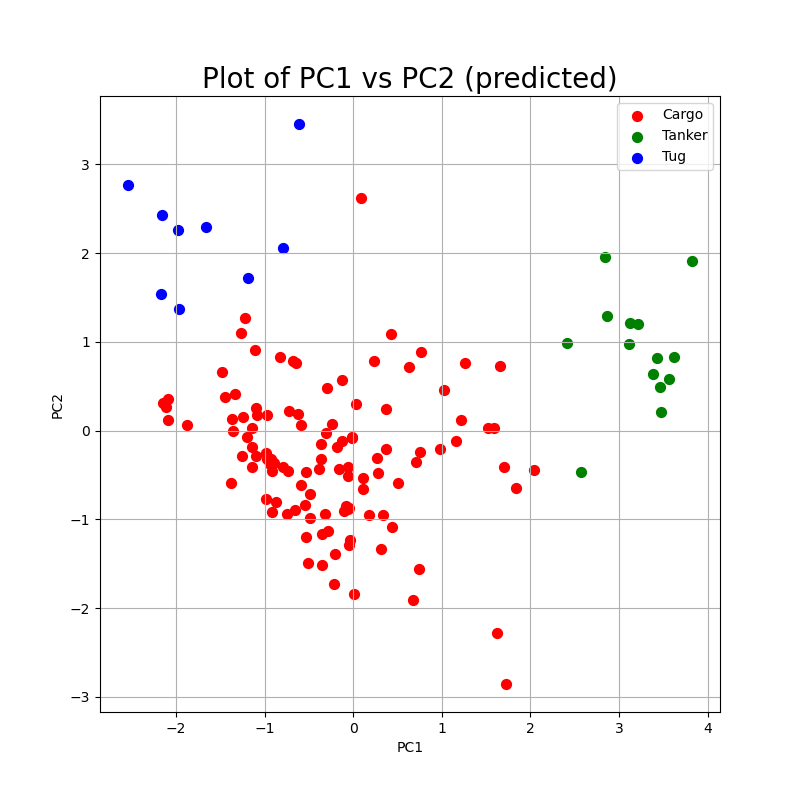

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2 (predicted)', fontsize = 20)

targets = ['Cargo', 'Tanker', 'Tug']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesKeep = newDataframe_pred['Ship_type'] == target
    ax.scatter(newDataframe_pred.loc[indicesKeep, 'PC1']
               , newDataframe_pred.loc[indicesKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

<IPython.core.display.Javascript object>


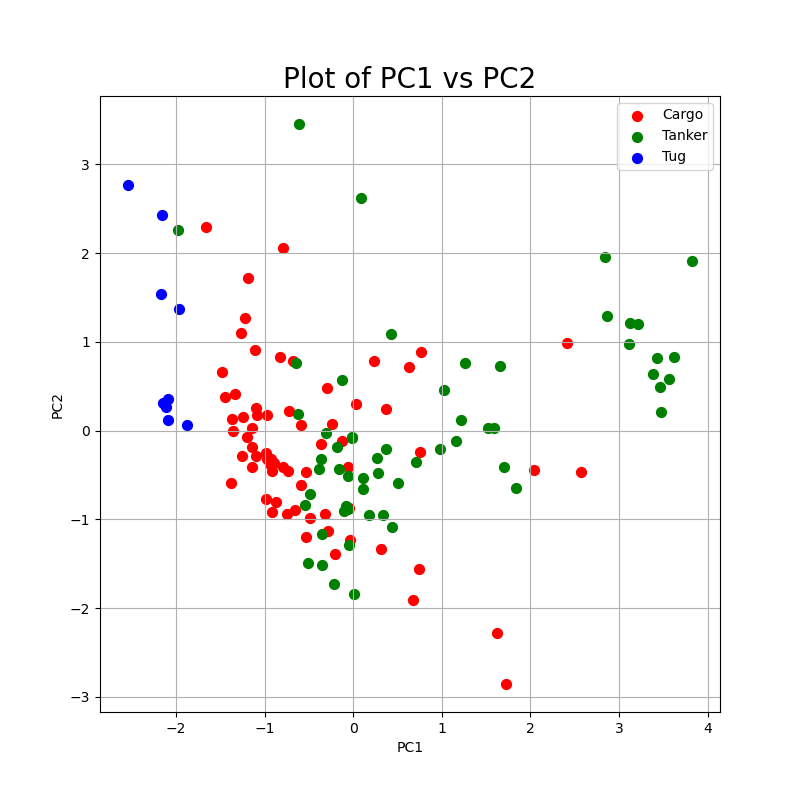

,PC1,PC2,Ship_type
0,-0.652630,-0.889659,Cargo
1,0.183623,-0.945607,Tanker
2,-0.011165,-0.082108,Tanker
3,0.280380,-0.482212,Tanker
4,-0.215014,-1.731853,Tanker


In [28]:

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Cargo', 'Tanker', 'Tug']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesKeep = newDataframe['Ship_type'] == target
    ax.scatter(newDataframe.loc[indicesKeep, 'PC1']
               , newDataframe.loc[indicesKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()
newDataframe.head()


In [31]:
labels = (targetDataframe.to_numpy().T)[0] #somehow, it works only if i specify the first element
print("Rand index =",rand_score(labels, targetDataframe_pred))


adj_rand_index = adjusted_rand_score(labels, targetDataframe_pred)
print("Adjusted rand index =",adj_rand_index)

Rand index = 0.5192458758837392
Adjusted rand index = 0.0840261353047265


####  Part 3a : Answers here:

Based solely on visualisation, the clustering seems to be somewhat successful, identifying the three clusters and their main positions. However, it is not perfect, a thing that can be seen form the rand index measurement since we got a value of about 0.5 for it. Normally, if the clustering would have been good or perfect, we would've gotten a value closer to 1 or even 1 exactly. The adjusted rand index is quite small, so this leads us to think that the maximum and minimum values of the rand index are not that far appart, so there is not a lot of variance for them, and we don't have negative values either (which could've been a possibility if the index was less than the expected index).

###  Part 3b: Another linkage criterion
 
 - Perform the same steps as in the previous task (3a), but this time using the "complete" linkage criterion. Visualize the clusters (predicted labels vs. the real labels) and compute the adjusted rand score for the predictions.
 
 - Which linkage criterion performs better based on visual inspection and the adjusted rand score? How do the two criteria differ from each other?
 
 - Compare the formulas for adjusted rand score and silhouette score. Can you explain (briefly) why a given linkage criterion can perform relatively well with respect to one metric and badly w.r.t. the other one?

<IPython.core.display.Javascript object>


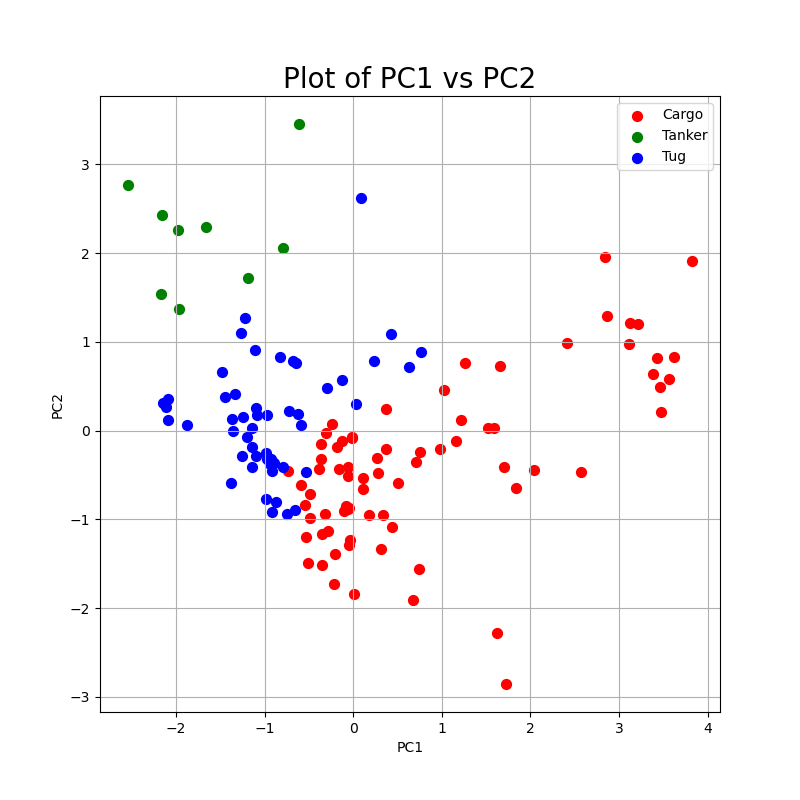

In [32]:
# code here...

clust_complete = AgglomerativeClustering(n_clusters=len(np.unique(targetDataframe)), linkage='complete')


targetDataframe_pred_complete = clust_complete.fit_predict(z)



#print(targetDataframe_pred)



df_complete = pd.DataFrame(targetDataframe_pred_complete, columns=['Ship_type'])
df_complete['Ship_type'] = df_complete['Ship_type'].replace(0, "Cargo")
df_complete['Ship_type'] = df_complete['Ship_type'].replace(1, "Tanker")
df_complete['Ship_type'] = df_complete['Ship_type'].replace(2, "Tug")



newDataframe_pred_complete = pd.concat([principalDataframe, df_complete],axis = 1)
#newDataframe_pred.head()


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Cargo', 'Tanker', 'Tug']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe_pred_complete['Ship_type'] == target
    ax.scatter(newDataframe_pred_complete.loc[indicesToKeep, 'PC1']
               , newDataframe_pred_complete.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [34]:
print("Rand index =",rand_score(labels, targetDataframe_pred_complete))

adj_rand_index_complete = adjusted_rand_score(labels, targetDataframe_pred_complete)
print("Adjusted rand index =",adj_rand_index_complete)

Rand index = 0.6458309953989452
Adjusted rand index = 0.28276078550109063


####  Part 3a : Answers here:

For this method, visually, the algorithm doesn't seem to perform well at all. It does identify the positions of the clusters somewhat correctly, but it puts the wrong labels on them. Given the fact that complete clustering tends to give us some more compact clusters, the groups do look nice and separated, but the information is not the best. 

Paradoxically, we got some good scores for the rand index and for the adjusted rand index. This can be due to the fact that for the "complete" criterion, we start with each element in a cluster of its own. The clusters are then combined bit by bit into larger clusters until all elements end up being in the same cluster, thus leading to possibly more accurate predictions.


### Part 4: Plot the dendrogram

 - As the last step, plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix - while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using both average and complete linkage, and plot the dendrograms using scipy.cluster.hierarchy.dendrogram). Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - How do you interpret the dendrograms? How do they differ?

<IPython.core.display.Javascript object>


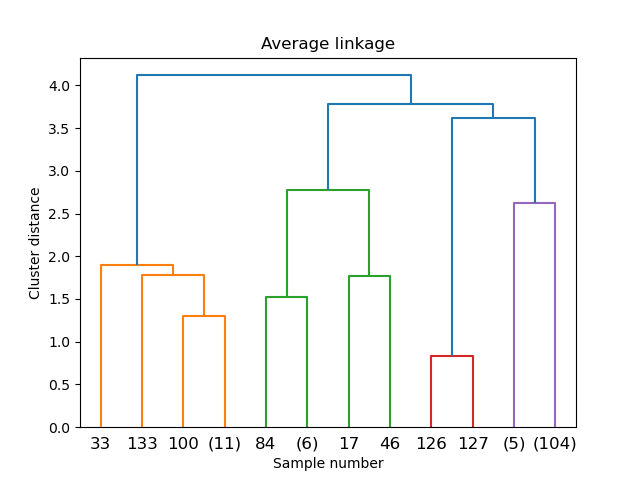

<IPython.core.display.Javascript object>


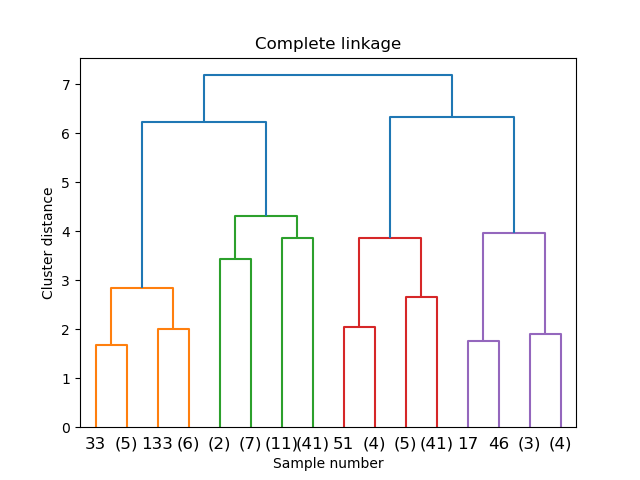

In [35]:
# code here...
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

dist = pdist(z)
dist_avg = linkage(dist, 'average')
dist_cmp = linkage(dist,'complete')

plt.figure()
dendo_avg = dendrogram(dist_avg,p=3,truncate_mode='level')
plt.title("Average linkage")
plt.xlabel("Sample number")
plt.ylabel("Cluster distance")
plt.show()

plt.figure()
dendo_cmp = dendrogram(dist_cmp,p=3,truncate_mode='level')
plt.title("Complete linkage")
plt.xlabel("Sample number")
plt.ylabel("Cluster distance")
plt.show()

####  Part 4 : Answers here:

Dendrograms are a summary of the distance matrix created, in our case, using the average and complete link algorithms. The distance to the data points represent the distance between the clusters and the height of the dendrograms indicate the order in which the clusters were joined. The heights generally reflect the distance between the clusters. This is why we can see that we have different height levels in the two dendrograms.

The main differences between the two are due to the fact that the average link algorithm the distance between two clusters is defined as the average of distances between all pairs of objects, where each pair is made up of one object from each group. At each stage of hierarchical clustering, the clusters for which the distance is the minimum, are merged and so we can get a cascading effect. On the other hand, the complete linkage algorithm computes the distance between every possible object pair, and then takes the maximum value of these distances as the distance between clusters. So, the distance between two clusters is given by the value of the longest link between the clusters and at each stage of hierarchical clustering, the clusters for which the distance is minimum, are merged. Therefore, we can only have pairings of objects (usually high values are paired with small values).

### Part 5 (optional bonus task): Implement K-Means clustering

 - For an extra point (pass with honors i.e. 100 in the 0/50/100 grading scheme), write your <b>own implementation</b> of the K-means clustering algorithm. The bonus point will be granted for a working implementation of the algorithm. It will not be granted for e.g. merely performing clustering using the scikit-learn implementation of K-Means or an unfinished implementation.
 - Visualize the labels predicted by your K-Means implementation against the real labels and compute the adjusted rand index.
 - Compare your K-Means implementation to the scikit-learn implementation. Do you get the same results? If not, why?
 - Remember to comment your code for readability.

In [ ]:
# code here...

####  Part 5 : Answers here: